<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.1-RNA/blob/main/Atividade_2_1_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalhamento da Atividade

In [ ]:
x = 12%4
print(x)

0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics
import unicodedata

In [ ]:
df = np.fromfile('/content/drive/My Drive/Colab Notebooks/dataAll.txt')
print(df)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


In [ ]:
df.shape


(3000,)

In [ ]:
df = df.reshape(1000, 3)
print(df)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


# Parte I – Resolvendo um Problema Linearmente Separável

In [91]:
# n (taxa de aprendizado)
theta = 0.0
n = 0.1
bias = -1.0

In [92]:
max = 0.5
min = -0.5
weight = np.random.uniform(min, max, size=3)
print(np.round(weight,4))

[-0.0737 -0.2445 -0.355 ]


In [93]:
epochs = 0
u = 0
adjust_total = 0
erros_in_epoch = 1000

while (erros_in_epoch != 0):
    epochs += 1
    adjust_in_epoch = 0
    erros_in_epoch = 0
    
    for example in df:
        fu = 0.0
        u = weight[0]*bias + weight[1]*example[0] + weight[2]*example[1]
        if u >= theta:
            fu = 1.0
        else:
            fu = 0.0
        u = 0.0
        
        if fu != example[2]:
            adjust_in_epoch += 1
            adjust_total += 1
            erros_in_epoch += 1
            weight = weight + n*(example[2] - fu)*np.array([bias, example[0], example[1]])
            weight = np.round(weight, 4)
            print("Vetor de pesos ajustado, novo vetor de pesos")
            np.set_printoptions(precision=4, suppress=True)
            print(weight)
            print("")
            
    print("Número de ajustes do vetor de pesos na época", epochs, ":", adjust_in_epoch)
    print("")
    
print("Número total de ajustes do vetor de pesos:", adjust_total)

Vetor de pesos ajustado, novo vetor de pesos
[  0.0263  36.1343 -24.7692]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1263  -17.5248 -101.265 ]

Vetor de pesos ajustado, novo vetor de pesos
[  0.0263  55.2712 -65.4354]

Vetor de pesos ajustado, novo vetor de pesos
[ -0.0737 137.8699  14.4204]

Vetor de pesos ajustado, novo vetor de pesos
[  0.0263 143.7157 -63.8742]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1263  103.7068 -141.7669]

Vetor de pesos ajustado, novo vetor de pesos
[  0.2263 157.3766 -92.6746]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1263  104.4165 -149.5441]

Vetor de pesos ajustado, novo vetor de pesos
[  0.2263 163.976  -99.4218]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1263  118.4514 -165.0577]

Vetor de pesos ajustado, novo vetor de pesos
[  0.2263 209.1673 -90.3444]

Vetor de pesos ajustado, novo vetor de pesos
[   0.1263  151.3863 -150.6526]

Vetor de pesos ajustado, novo vetor de pesos
[   0.0263  103.1197 -199.1223]

Vetor d

In [95]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weight[0]/weight[2]), 4)) + 
      " -(" + 
      str(np.round((weight[1]/weight[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.0022 -(-1.0022)*x1


1.002158769519715
0.0021720669530353


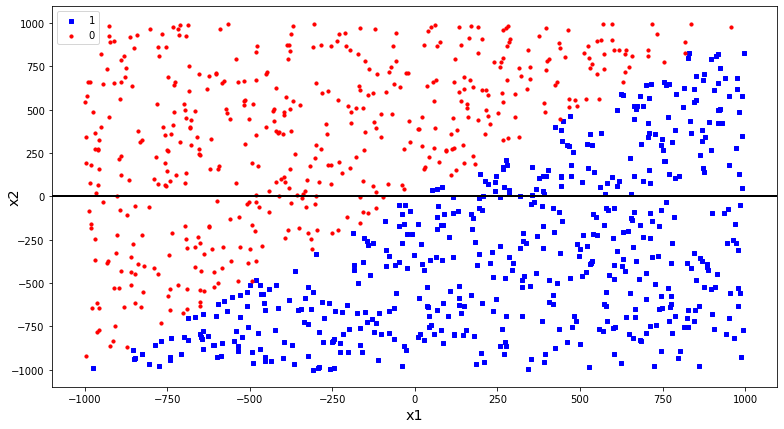

In [120]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in df:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-10, size='x-large')

slope = -(weight[0]/weight[2]) / (weight[0]/weight[1]) 


plt.axline(1, (weight[0]/weight[2]), slope, color="black", lw=2)

plt.show()